# 라이브러리

In [2]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=50a9ecd91a48d6de9ba06d1a73b4de7d8c1aaeb1cdbf84b5e109bf43dec973af
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [3]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 10.5 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=49e29805463c435e2b91743a37cab3c31ebb1e117009b1c4b839700aca994a5e
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,864 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120893 files and dire

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/중극장충격요인수정_조인최종.csv")

In [5]:
df.columns

Index(['공연시설코드', '충격반응력', '충격회복력', '직장인구수', '버스승차', '버스하차', '철도승차', '철도하차',
       '버스승하차', '철도승하차', 'GRDP', '지방세징수액', '평균연령', '세대당인구', '총인구수', '세대수',
       '주차장', '정류장', '지하철출구', '터미널', '영화상영관', '박물관미술관', '도서관', '면적10000이상공원',
       '검색량합계', '검색량평균', '전체면적대비도로면적', '좌석수', '예매/취소금액', '할인금액', '장당금액',
       '평균좌석점유율', '좌석수_합계', '예매/취소금액_합계', '할인금액_합계', '장당금액_합계', '예매건수_합계',
       '평균좌석점유율_합계'],
      dtype='object')

In [6]:
df = df[['공연시설코드', '버스승하차', '철도승하차', 'GRDP', '직장인구수', '지방세징수액', '세대당인구', '총인구수','평균연령', '주차장', '정류장', '터미널', '영화상영관','박물관미술관', '도서관', '면적10000이상공원', '검색량합계', '전체면적대비도로면적']]

In [7]:
df.head()

,공연시설코드,버스승하차,철도승하차,GRDP,직장인구수,지방세징수액,세대당인구,총인구수,평균연령,주차장,정류장,터미널,영화상영관,박물관미술관,도서관,면적10000이상공원,검색량합계,전체면적대비도로면적
0,FC222007,8.664458e+06,0.000000e+00,39860038.0,92508.0,1.399323e+09,2.343281,3143568.0,43.892187,0.0,10.0,0.0,13.0,0.0,1.0,1.0,33170.0,4.436285
1,FC222040,2.382531e+06,0.000000e+00,2731839.0,33172.0,6.324200e+04,2.113333,236606.0,49.491667,1.0,27.0,0.0,0.0,0.0,1.0,1.0,52470.0,7.076850
2,FC222048,2.134141e+06,0.000000e+00,25870664.0,90358.0,4.881770e+05,2.138387,565264.0,48.935484,1.0,1.0,0.0,13.0,0.0,0.0,6.0,10943.0,3.016880
3,FC222049,4.581395e+06,7.623272e+06,3116148.0,98395.0,1.309470e+05,2.402143,584774.0,44.350000,3.0,26.0,0.0,9.0,0.0,0.0,2.0,19354.0,3.153287
4,FC222054,4.860323e+06,2.306523e+06,9503602.0,134401.0,4.499700e+05,2.400526,814208.0,44.000000,0.0,30.0,0.0,17.0,3.0,1.0,2.0,190690.0,3.567653


In [8]:
df.isna().sum()

공연시설코드         0
버스승하차          0
철도승하차          0
GRDP           0
직장인구수          0
지방세징수액         0
세대당인구          0
총인구수           0
평균연령           0
주차장            0
정류장            0
터미널            0
영화상영관          0
박물관미술관         0
도서관            0
면적10000이상공원    0
검색량합계          0
전체면적대비도로면적     0
dtype: int64

In [9]:
df.columns

Index(['공연시설코드', '버스승하차', '철도승하차', 'GRDP', '직장인구수', '지방세징수액', '세대당인구', '총인구수',
       '평균연령', '주차장', '정류장', '터미널', '영화상영관', '박물관미술관', '도서관', '면적10000이상공원',
       '검색량합계', '전체면적대비도로면적'],
      dtype='object')

In [10]:
# 영화관, 박물관, 도서관, 공원 하나의 문화시설로 통합

df["문화시설"] = df["영화상영관"] + df["박물관미술관"] + df["도서관"] + df["면적10000이상공원"]
df = df.drop(["영화상영관", "박물관미술관", "도서관", "면적10000이상공원"], axis=1)

# 터미널 정류장 통합
df["정류장"] = df["정류장"] + df["터미널"]
df = df.drop(["터미널"], axis=1)

# 철도 + 버스승하차 통합
df["대중교통이용량"] = df["버스승하차"] + df["철도승하차"]
df = df.drop(["버스승하차","철도승하차"], axis=1)

df = df[['공연시설코드',  'GRDP', '지방세징수액', '총인구수', '주차장','문화시설', '평균연령', '직장인구수' ,'정류장',
       '검색량합계', '전체면적대비도로면적', '대중교통이용량']]

# 상관관계

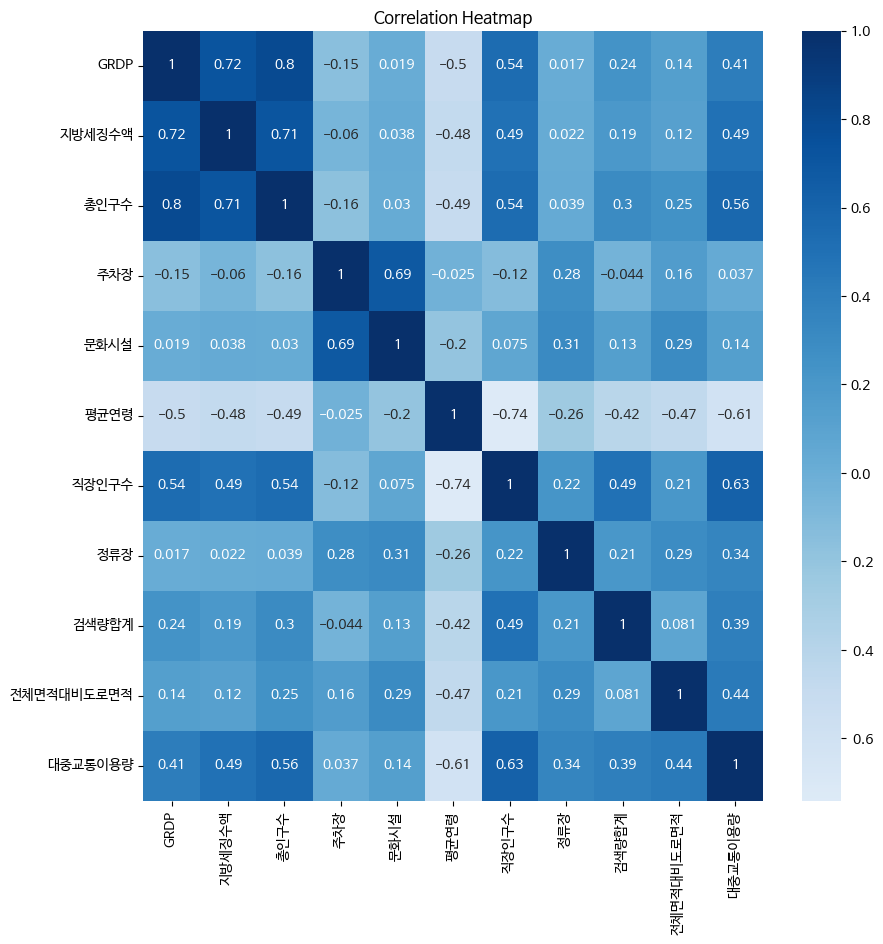

In [11]:
# 변수들 간의 상관관계 행렬 계산
correlation_matrix = df.corr()

# 히트맵으로 상관관계 행렬 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 1. 3-1-1. KMO검정/Bartlett검정

## 데이터 왜도첨도 분석

### 데이터 분포 시각화

### StandarScaler

In [12]:
df

,공연시설코드,GRDP,지방세징수액,총인구수,주차장,문화시설,평균연령,직장인구수,정류장,검색량합계,전체면적대비도로면적,대중교통이용량
0,FC222007,39860038.0,1.399323e+09,3143568.0,0.0,15.0,43.892187,92508.0,10.0,33170.0,4.436285,8.664458e+06
1,FC222040,2731839.0,6.324200e+04,236606.0,1.0,2.0,49.491667,33172.0,27.0,52470.0,7.076850,2.382531e+06
2,FC222048,25870664.0,4.881770e+05,565264.0,1.0,19.0,48.935484,90358.0,1.0,10943.0,3.016880,2.134141e+06
3,FC222049,3116148.0,1.309470e+05,584774.0,3.0,11.0,44.350000,98395.0,26.0,19354.0,3.153287,1.220467e+07
4,FC222054,9503602.0,4.499700e+05,814208.0,0.0,23.0,44.000000,134401.0,30.0,190690.0,3.567653,7.166846e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
131,FC223909,5651552.0,2.198940e+05,426696.0,6.0,5.0,47.886364,66567.0,9.0,201796.0,1.130609,1.093840e+06
132,FC223941,1411244.0,7.076600e+04,84686.0,0.0,3.0,51.730000,10443.0,1.0,23859.0,0.503136,2.307167e+04
133,FC224381,9218503.0,2.964040e+05,542558.0,2.0,15.0,48.564286,84191.0,12.0,38658.0,3.509188,7.737990e+05
134,FC224454,2222383.0,1.006980e+05,99114.0,2.0,3.0,53.508333,13619.0,6.0,1306.0,0.665245,3.355667e+04


In [13]:
data = df.iloc[:,1:]

In [14]:
# Standardization 평균 0 / 분산 1
scaler = StandardScaler()

scaler = scaler.fit_transform(data)

In [15]:
scaler

array([[ 3.60165172,  4.02396332,  4.20905277, ..., -0.1626383 ,
         0.51477676,  1.77186958],
       [-0.77976027, -0.63227311, -0.59363794, ...,  0.22946279,
         1.51805929, -0.16021443],
       [ 1.95079839, -0.63085908, -0.05065089, ..., -0.61420467,
        -0.02452608, -0.23660989],
       ...,
       [-0.01428421, -0.63149723, -0.08816425, ..., -0.05114344,
         0.16252612, -0.65499987],
       [-0.83987999, -0.63214847, -0.82079315, ..., -0.8099911 ,
        -0.91802989, -0.88267054],
       [ 0.13217097,  0.44429897,  0.45548035, ..., -0.01508233,
         0.06795198,  0.46800607]])

In [16]:
columns = ['GRDP' , '지방세징수액', '총인구수', '주차장','문화시설', '평균연령', '직장인구수','정류장',
       '검색량합계', '전체면적대비도로면적', '대중교통이용량']

scaler_df = pd.DataFrame(scaler, columns=columns)

scaler_df

,GRDP,지방세징수액,총인구수,주차장,문화시설,평균연령,직장인구수,정류장,검색량합계,전체면적대비도로면적,대중교통이용량
0,3.601652,4.023963,4.209053,-0.548886,0.241296,-0.727462,0.352083,-0.075414,-0.162638,0.514777,1.771870
1,-0.779760,-0.632273,-0.593638,-0.404219,-0.500636,0.437346,-0.794831,2.313028,0.229463,1.518059,-0.160214
2,1.950798,-0.630859,-0.050651,-0.404219,0.469583,0.321649,0.310525,-1.339882,-0.614205,-0.024526,-0.236610
3,-0.734409,-0.632048,-0.018418,-0.114883,0.013009,-0.632227,0.465873,2.172531,-0.443326,0.027302,2.860705
4,0.019360,-0.630986,0.360638,-0.548886,0.697869,-0.705035,1.161838,2.734517,3.037557,0.184740,1.311261
...,...,...,...,...,...,...,...,...,...,...,...
131,-0.435212,-0.631752,-0.279584,0.319120,-0.329421,0.103410,-0.149334,-0.215910,3.263188,-0.741215,-0.556567
132,-0.935601,-0.632248,-0.844630,-0.548886,-0.443565,0.902966,-1.234163,-1.339882,-0.351802,-0.979623,-0.885895
133,-0.014284,-0.631497,-0.088164,-0.259551,0.241296,0.244432,0.191322,0.205579,-0.051143,0.162526,-0.655000
134,-0.839880,-0.632148,-0.820793,-0.259551,-0.443565,1.272896,-1.172774,-0.637400,-0.809991,-0.918030,-0.882671


## 가. KMO 검정

In [17]:
kmo_all,kmo_model=calculate_kmo(scaler_df)

np.round(kmo_model, 2)

# 로그변환만 적용한 후에 KMO 적용했을때 점수가 가장 높음

0.77

## 나. Bartlett 구형성 검정

In [18]:
chi_square_value,p_value=calculate_bartlett_sphericity(scaler_df)

chi_square_value, p_value

(758.8506595316078, 1.8905219927634819e-124)

# 3-1-2. 주성분 분석/요인회전

In [19]:
scaler_df

,GRDP,지방세징수액,총인구수,주차장,문화시설,평균연령,직장인구수,정류장,검색량합계,전체면적대비도로면적,대중교통이용량
0,3.601652,4.023963,4.209053,-0.548886,0.241296,-0.727462,0.352083,-0.075414,-0.162638,0.514777,1.771870
1,-0.779760,-0.632273,-0.593638,-0.404219,-0.500636,0.437346,-0.794831,2.313028,0.229463,1.518059,-0.160214
2,1.950798,-0.630859,-0.050651,-0.404219,0.469583,0.321649,0.310525,-1.339882,-0.614205,-0.024526,-0.236610
3,-0.734409,-0.632048,-0.018418,-0.114883,0.013009,-0.632227,0.465873,2.172531,-0.443326,0.027302,2.860705
4,0.019360,-0.630986,0.360638,-0.548886,0.697869,-0.705035,1.161838,2.734517,3.037557,0.184740,1.311261
...,...,...,...,...,...,...,...,...,...,...,...
131,-0.435212,-0.631752,-0.279584,0.319120,-0.329421,0.103410,-0.149334,-0.215910,3.263188,-0.741215,-0.556567
132,-0.935601,-0.632248,-0.844630,-0.548886,-0.443565,0.902966,-1.234163,-1.339882,-0.351802,-0.979623,-0.885895
133,-0.014284,-0.631497,-0.088164,-0.259551,0.241296,0.244432,0.191322,0.205579,-0.051143,0.162526,-0.655000
134,-0.839880,-0.632148,-0.820793,-0.259551,-0.443565,1.272896,-1.172774,-0.637400,-0.809991,-0.918030,-0.882671


In [20]:
from factor_analyzer import FactorAnalyzer

# Create a FactorAnalyzer object
fa = FactorAnalyzer(n_factors=3, method='principal', rotation='varimax')

# Fit the factor analysis model
fa.fit(scaler_df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()

# print("Eigenvalues:", ev)

In [21]:
# df_fa.corr()

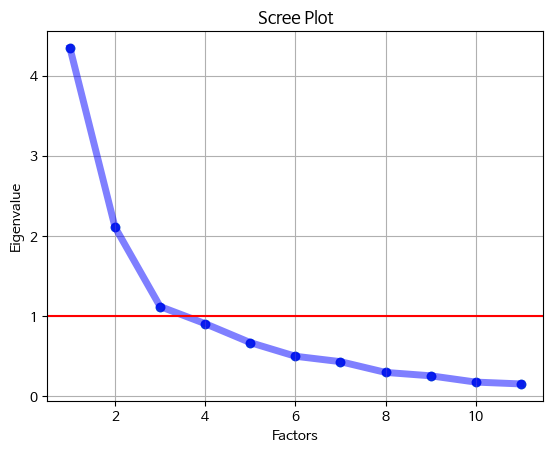

In [22]:
plt.scatter(range(1,scaler_df.shape[1]+1),ev)

plt.plot(range(1,scaler_df.shape[1]+1),ev,marker = 'o', color = 'blue', alpha = 0.5, linewidth = 5)

plt.title('Scree Plot')

plt.xlabel('Factors')
plt.axhline(y=1, color='red', linestyle='-')
plt.ylabel('Eigenvalue')

plt.grid()

plt.show()

# 3-1-3. 요인점수 계산

## 요인적재량

In [23]:
scaler_df.columns

Index(['GRDP', '지방세징수액', '총인구수', '주차장', '문화시설', '평균연령', '직장인구수', '정류장',
       '검색량합계', '전체면적대비도로면적', '대중교통이용량'],
      dtype='object')

In [24]:
# Get factor loadings
factor_loadings = fa.loadings_

# Convert factor loadings to a DataFrame for better visualization
factor_loadings_df = pd.DataFrame(factor_loadings, index=scaler_df.columns)

In [25]:
scaler_df = scaler_df.rename({"검색량합계":"공연검색량", "주차장":"주차장 개수", "정류장":"정류장 개수", "문화시설":"문화시설 개수"}, axis=1)

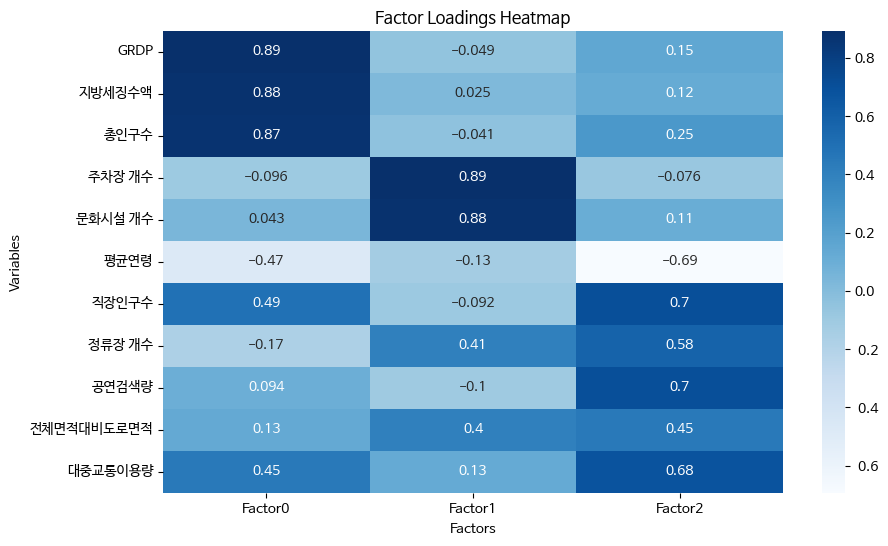

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for factor loadings
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings, cmap='Blues', annot=True, yticklabels=scaler_df.columns)
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')  # 변경된 부분: x축 레이블 수정
plt.ylabel('Variables')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Factor0", "Factor1", "Factor2"])  # x축 눈금 및 레이블 수정
plt.show()


- Factor 0 : 도시 규모 및 경제
- Factor 1 : 편의성 및 인프라
- Factor 2 : 접근성 및 인구 특성

## 표준화된 데이터와 요인 계수 내적하여 극장별 요인점수 도출

In [27]:
factor_scores = fa.transform(scaler_df)

In [28]:
len(factor_scores)

136

In [29]:
# 데이터프레임 생성
# df_fa = pd.DataFrame(factor_scores, columns=['F0', 'F1'])
# df_fa["공연시설코드"] = df["공연시설코드"]
# df_fa = df_fa[['공연시설코드','F0', 'F1']]

df_fa = pd.DataFrame(factor_scores, columns=['F0', 'F1','F2'])
df_fa["공연시설코드"] = df["공연시설코드"]
df_fa = df_fa[['공연시설코드','F0', 'F1', 'F2']]

df_fa

,공연시설코드,F0,F1,F2
0,FC222007,4.327203,0.325378,-0.916676
1,FC222040,-1.378336,0.089452,1.102643
2,FC222048,0.842314,-0.093234,-0.889760
3,FC222049,-0.785481,0.203923,1.760515
4,FC222054,-1.074373,-0.191050,3.021900
...,...,...,...,...
131,FC223909,-0.979601,-0.688623,1.075402
132,FC223941,-0.635945,-0.704079,-1.052337
133,FC224381,-0.331827,-0.026751,0.048375
134,FC224454,-0.663890,-0.400469,-1.129957


## 신뢰성 분석(reliability)

### Tucker Lewis's reliability (0.7이상 상당히 신뢰, 0.6이상 신뢰)

In [30]:
ev

array([4.35273364, 2.11352277, 1.12287952, 0.90884159, 0.67233076,
       0.50191102, 0.43435761, 0.30009506, 0.25777395, 0.1791782 ,
       0.15637589])

In [31]:
def tucker_lewis_reliability(eigenvalues, num_factors):
    total_eigenvalues = sum(eigenvalues)
    selected_eigenvalues = sum(eigenvalues[:num_factors])
    reliability = selected_eigenvalues / (total_eigenvalues)
    return reliability

eigenvalues = ev

# 선택한 요인의 수
num_factors = 3

# Tucker Lewis의 신뢰성 계산
reliability = tucker_lewis_reliability(eigenvalues, num_factors)
print("Tucker Lewis Reliability:", reliability)

Tucker Lewis Reliability: 0.6899214478711224


# 3-2 요인점수를 활용한 비수도권 중극장 군집분석

## 로그변환

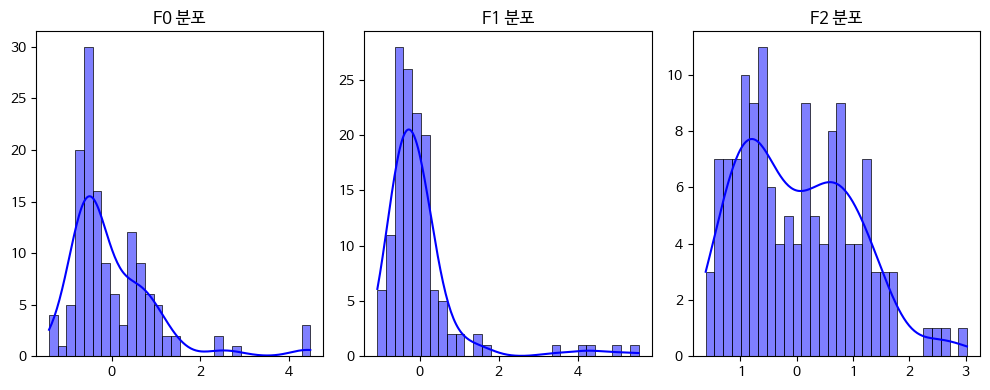

In [32]:
l = ["F0","F1", "F2"]#, "P2", "P3"]

num_cols = len(l)  # 한 행당 시각화할 변수의 수
num_rows = len(l) // num_cols + (len(l) % num_cols > 0)  # 변수 수에 따른 행 수 계산

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4))

for i, var in enumerate(l):
    # row = i // num_cols
    # col = i % num_cols
    sns.histplot(df_fa[var], bins=30, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'{var} 분포')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# 빈 서브플롯 비우기
for i in range(len(l), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [33]:
for _ in range(2):
  df_fa['F0'] = np.array(df_fa['F0']) - min(df_fa['F0']) + 1
  df_fa['F0']= np.log(df_fa['F0'])

  df_fa['F1'] = np.array(df_fa['F1']) - min(df_fa['F1']) + 1
  df_fa['F1']= np.log(df_fa['F1'])

In [34]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

k_range = range(2,15)
inertia_arr = []

for k in k_range:
  Kmeans = KMeans(n_clusters=k, init='k-means++', random_state=10)
  Kmeans.fit(df_fa.iloc[:,1:])
  interia = Kmeans.inertia_

  print('k :', k, 'inertia: ', interia)
  inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr)

k : 2 inertia:  46.677154507830735
k : 3 inertia:  28.399114092168123
k : 4 inertia:  20.93252687265626
k : 5 inertia:  16.098021064205795
k : 6 inertia:  12.606848869208516
k : 7 inertia:  11.133946120454585
k : 8 inertia:  10.05064318872094
k : 9 inertia:  9.251683677433833
k : 10 inertia:  8.289758519495793
k : 11 inertia:  7.7616166690044235
k : 12 inertia:  6.992094363108094
k : 13 inertia:  6.886270234959431
k : 14 inertia:  6.566711189944449


## 실루엣

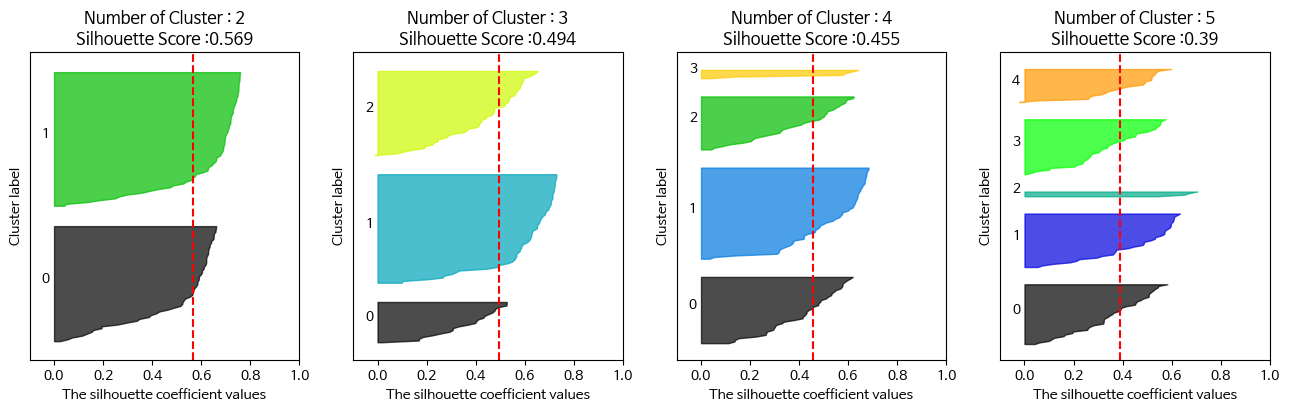

In [35]:
def visualize_silhouette(cluster_lists, X_features):
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, init="k-means++", random_state= 10)
        # clusterer = KMeans(n_clusters = n_cluster, init="k-means++", n_init= 1 ,max_iter=50, random_state=42)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        # sil_avg_rounded = round(sil_avg, 1)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5], df_fa.iloc[:,1:])

In [36]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, init='k-means++', random_state = 10)

# 정규화된 데이터에 학습
model.fit(df_fa.iloc[:,1:])

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_fa['cluster'] = model.fit_predict(df_fa.iloc[:,1:])

In [37]:
df_fa.cluster.value_counts()

1    73
0    63
Name: cluster, dtype: int64

## 군집별 특징도출

In [38]:
# 0번 군집

df_fa[df_fa.cluster == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
F0,63.0,0.594482,0.203505,0.000000,0.486725,0.633268,0.750681,0.975490
F1,63.0,0.496334,0.212804,0.000000,0.390469,0.490546,0.593791,1.108887
F2,63.0,0.915983,0.628126,0.094083,0.517115,0.763007,1.215780,3.021900
cluster,63.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
df = pd.read_csv("data/중극장충격요인수정_조인최종.csv")

# 영화관, 박물관, 도서관, 공원 하나의 문화시설로 통합

df["문화시설"] = df["영화상영관"] + df["박물관미술관"] + df["도서관"] + df["면적10000이상공원"]
df = df.drop(["영화상영관", "박물관미술관", "도서관", "면적10000이상공원"], axis=1)

# 터미널 정류장 통합
df["정류장"] = df["정류장"] + df["터미널"]
df = df.drop(["터미널"], axis=1)

# 철도 + 버스승하차 통합
df["대중교통이용량"] = df["버스승하차"] + df["철도승하차"]
df = df.drop(["버스승하차","철도승하차"], axis=1)

In [40]:
df.columns

Index(['공연시설코드', '충격반응력', '충격회복력', '직장인구수', '버스승차', '버스하차', '철도승차', '철도하차',
       'GRDP', '지방세징수액', '평균연령', '세대당인구', '총인구수', '세대수', '주차장', '정류장', '지하철출구',
       '검색량합계', '검색량평균', '전체면적대비도로면적', '좌석수', '예매/취소금액', '할인금액', '장당금액',
       '평균좌석점유율', '좌석수_합계', '예매/취소금액_합계', '할인금액_합계', '장당금액_합계', '예매건수_합계',
       '평균좌석점유율_합계', '문화시설', '대중교통이용량'],
      dtype='object')

In [41]:
df = df[['공연시설코드','GRDP', '지방세징수액','총인구수', '주차장', '문화시설', '평균연령', '직장인구수', '정류장', '검색량합계', '전체면적대비도로면적','대중교통이용량', '좌석수', '예매/취소금액', '할인금액', '장당금액',
       '평균좌석점유율', '좌석수_합계', '예매/취소금액_합계', '할인금액_합계', '장당금액_합계', '예매건수_합계',
       '평균좌석점유율_합계', '충격반응력', '충격회복력']]

In [42]:
test = pd.merge(df, df_fa, how="left", on="공연시설코드")

In [ ]:
test[test.cluster==0].describe()

,GRDP,지방세징수액,총인구수,주차장,문화시설,평균연령,직장인구수,정류장,검색량합계,전체면적대비도로면적,...,할인금액_합계,장당금액_합계,예매건수_합계,평균좌석점유율_합계,충격반응력,충격회복력,F0,F1,F2,cluster
count,6.300000e+01,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,1.026175e+07,2.381912e+08,7.593244e+05,3.984127,13.857143,44.096886,109506.063492,13.698413,73915.492063,4.521316,...,9.033042e+06,1.110619e+08,5984.365079,3092.959822,-10.495157,14.131477,0.594482,0.496334,0.915983,0.0
std,5.562580e+06,2.743106e+08,4.682877e+05,7.301109,21.902907,2.855193,45979.753388,8.208247,55372.615509,3.126965,...,3.760314e+07,1.716268e+08,6851.019781,4551.645585,31.901032,79.762032,0.203505,0.212804,0.628126,0.0
min,2.731839e+06,6.324200e+04,1.557160e+05,0.000000,0.000000,36.800000,24447.000000,3.000000,6310.000000,1.130609,...,0.000000e+00,2.580000e+05,67.000000,4.891000,-100.000000,-100.000000,0.000000,0.000000,0.094083,0.0
25%,5.651552e+06,3.578215e+05,4.837520e+05,0.000000,3.000000,42.859161,79301.000000,8.000000,29898.000000,2.083511,...,0.000000e+00,1.551736e+07,1344.000000,428.275867,0.000000,0.000000,0.486725,0.390469,0.517115,0.0
50%,1.045957e+07,1.579580e+08,6.940920e+05,2.000000,6.000000,43.481250,107749.000000,12.000000,58720.000000,3.547540,...,2.310000e+04,5.154520e+07,3470.000000,1171.737925,0.846289,2.864677,0.633268,0.490546,0.763007,0.0
75%,1.271479e+07,3.921546e+08,8.751390e+05,5.500000,13.000000,45.734615,140338.000000,18.000000,103167.000000,5.511045,...,1.170300e+06,1.384999e+08,8157.500000,2959.093583,0.969123,16.877144,0.750681,0.593791,1.215780,0.0
max,3.496568e+07,1.186535e+09,2.517111e+06,36.000000,106.000000,49.620833,195405.000000,39.000000,249648.000000,12.812598,...,2.282190e+08,7.616892e+08,33497.000000,21817.095528,0.999417,456.331180,0.975490,1.108887,3.021900,0.0


In [ ]:
# 1번 군집

df_fa[df_fa.cluster == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
F0,73.0,0.570202,0.170000,0.368028,0.461239,0.507815,0.627247,1.075952
F1,73.0,0.484901,0.153528,0.255575,0.382858,0.439013,0.562719,1.035818
F2,73.0,-0.790505,0.425934,-1.610430,-1.110496,-0.780559,-0.517664,0.048375
cluster,73.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test[test.cluster==1].describe()

,GRDP,지방세징수액,총인구수,주차장,문화시설,평균연령,직장인구수,정류장,검색량합계,전체면적대비도로면적,...,할인금액_합계,장당금액_합계,예매건수_합계,평균좌석점유율_합계,충격반응력,충격회복력,F0,F1,F2,cluster
count,7.300000e+01,7.300000e+01,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,7.300000e+01,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,8.543671e+06,1.485398e+08,4.549032e+05,3.630137,8.109589,50.230606,43903.397260,7.808219,12920.219178,1.838791,...,4.392599e+05,3.364364e+07,2675.178082,1718.949013,-7.756127,12.064188,0.570202,0.484901,-0.790505,1.0
std,1.037344e+07,3.193924e+08,6.779781e+05,6.655213,12.300137,4.354407,34840.695409,4.623784,13739.230779,1.133496,...,2.456424e+06,4.421598e+07,3182.982836,2676.370366,27.798576,104.091637,0.170000,0.153528,0.425934,0.0
min,8.499630e+05,2.630100e+04,5.468800e+04,0.000000,0.000000,38.280000,6652.000000,0.000000,843.000000,0.189250,...,0.000000e+00,2.000000e+04,2.000000,0.008000,-100.000000,-100.000000,0.368028,0.255575,-1.610430,1.0
25%,2.119933e+06,8.542900e+04,1.306820e+05,0.000000,3.000000,47.266667,14929.000000,4.000000,4500.000000,0.894702,...,0.000000e+00,4.450489e+06,382.000000,76.452000,0.000000,0.000000,0.461239,0.382858,-1.110496,1.0
50%,3.323778e+06,4.881770e+05,2.120140e+05,1.000000,5.000000,50.690909,30774.000000,8.000000,8601.000000,1.550506,...,0.000000e+00,1.470170e+07,1913.000000,917.885400,0.571071,0.756614,0.507815,0.439013,-0.780559,1.0
75%,9.218503e+06,1.315655e+08,4.360060e+05,5.000000,8.000000,53.633333,67453.000000,12.000000,13431.000000,2.811859,...,9.906500e+04,3.677540e+07,3436.000000,2302.625333,0.924897,9.437189,0.627247,0.562719,-0.517664,1.0
max,3.986004e+07,1.399323e+09,3.143568e+06,38.000000,80.000000,58.363158,158145.000000,18.000000,79005.000000,4.436285,...,2.090750e+07,1.784036e+08,17608.000000,17373.989000,0.999441,838.051600,1.075952,1.035818,0.048375,1.0


In [54]:
test.columns

Index(['공연시설코드', 'GRDP', '지방세징수액', '총인구수', '주차장', '문화시설', '평균연령', '직장인구수',
       '정류장', '검색량합계', '전체면적대비도로면적', '대중교통이용량', '좌석수', '예매/취소금액', '할인금액',
       '장당금액', '평균좌석점유율', '좌석수_합계', '예매/취소금액_합계', '할인금액_합계', '장당금액_합계',
       '예매건수_합계', '평균좌석점유율_합계', '충격반응력', '충격회복력', 'F0', 'F1', 'F2', 'cluster'],
      dtype='object')

# 회복탄력성 데이터 조인

In [61]:
data = pd.read_csv("data/Medium_Theater_0_Reflection_X.csv").drop(["충격반응력", "충격회복력", "cluster"], axis=1)

In [63]:
last = pd.merge(test, data, how="left", on="공연시설코드")

In [64]:
last.columns

Index(['공연시설코드', 'GRDP', '지방세징수액', '총인구수', '주차장', '문화시설', '평균연령', '직장인구수',
       '정류장', '검색량합계', '전체면적대비도로면적', '대중교통이용량', '좌석수', '예매/취소금액', '할인금액',
       '장당금액', '평균좌석점유율', '좌석수_합계', '예매/취소금액_합계', '할인금액_합계', '장당금액_합계',
       '예매건수_합계', '평균좌석점유율_합계', '충격반응력', '충격회복력', 'F0', 'F1', 'F2', 'cluster',
       '감소폭', '감소기간', '최저지점이후회복기간', '총기간', 'ratio', 'resilience'],
      dtype='object')

In [65]:
# last.to_csv("중극장_요인분석_유형분류_회복력조인.csv", index=False)